In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os
os.chdir('/Users/ntevensguyen/z_jupyter_data')
        
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df=df.drop('Id', axis=1)

In [6]:
df.shape

(2768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [8]:
df.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000,2768.000,2768.000,2768.000,2768.000,2768.000,2768.000,2768.000,2768.000
mean,3.743,121.103,69.134,20.824,80.128,32.137,0.471,33.132,0.344
std,3.324,32.037,19.231,16.060,112.302,8.076,0.326,11.777,0.475
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,37.000,32.200,0.375,29.000,0.000
75%,6.000,141.000,80.000,32.000,130.000,36.625,0.624,40.000,1.000
max,17.000,199.000,122.000,110.000,846.000,80.600,2.420,81.000,1.000


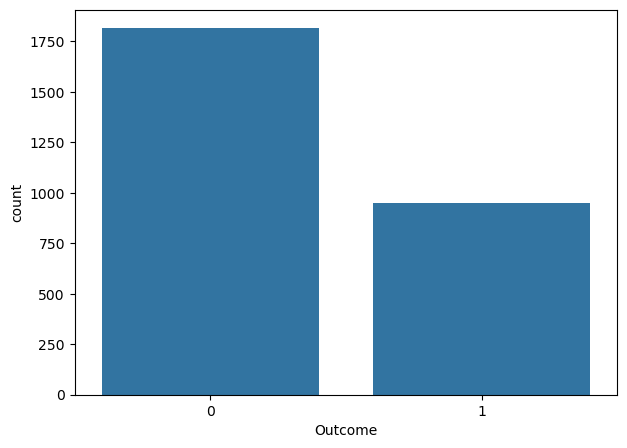

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df)
plt.show()

In [10]:
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

<Figure size 2000x1500 with 0 Axes>

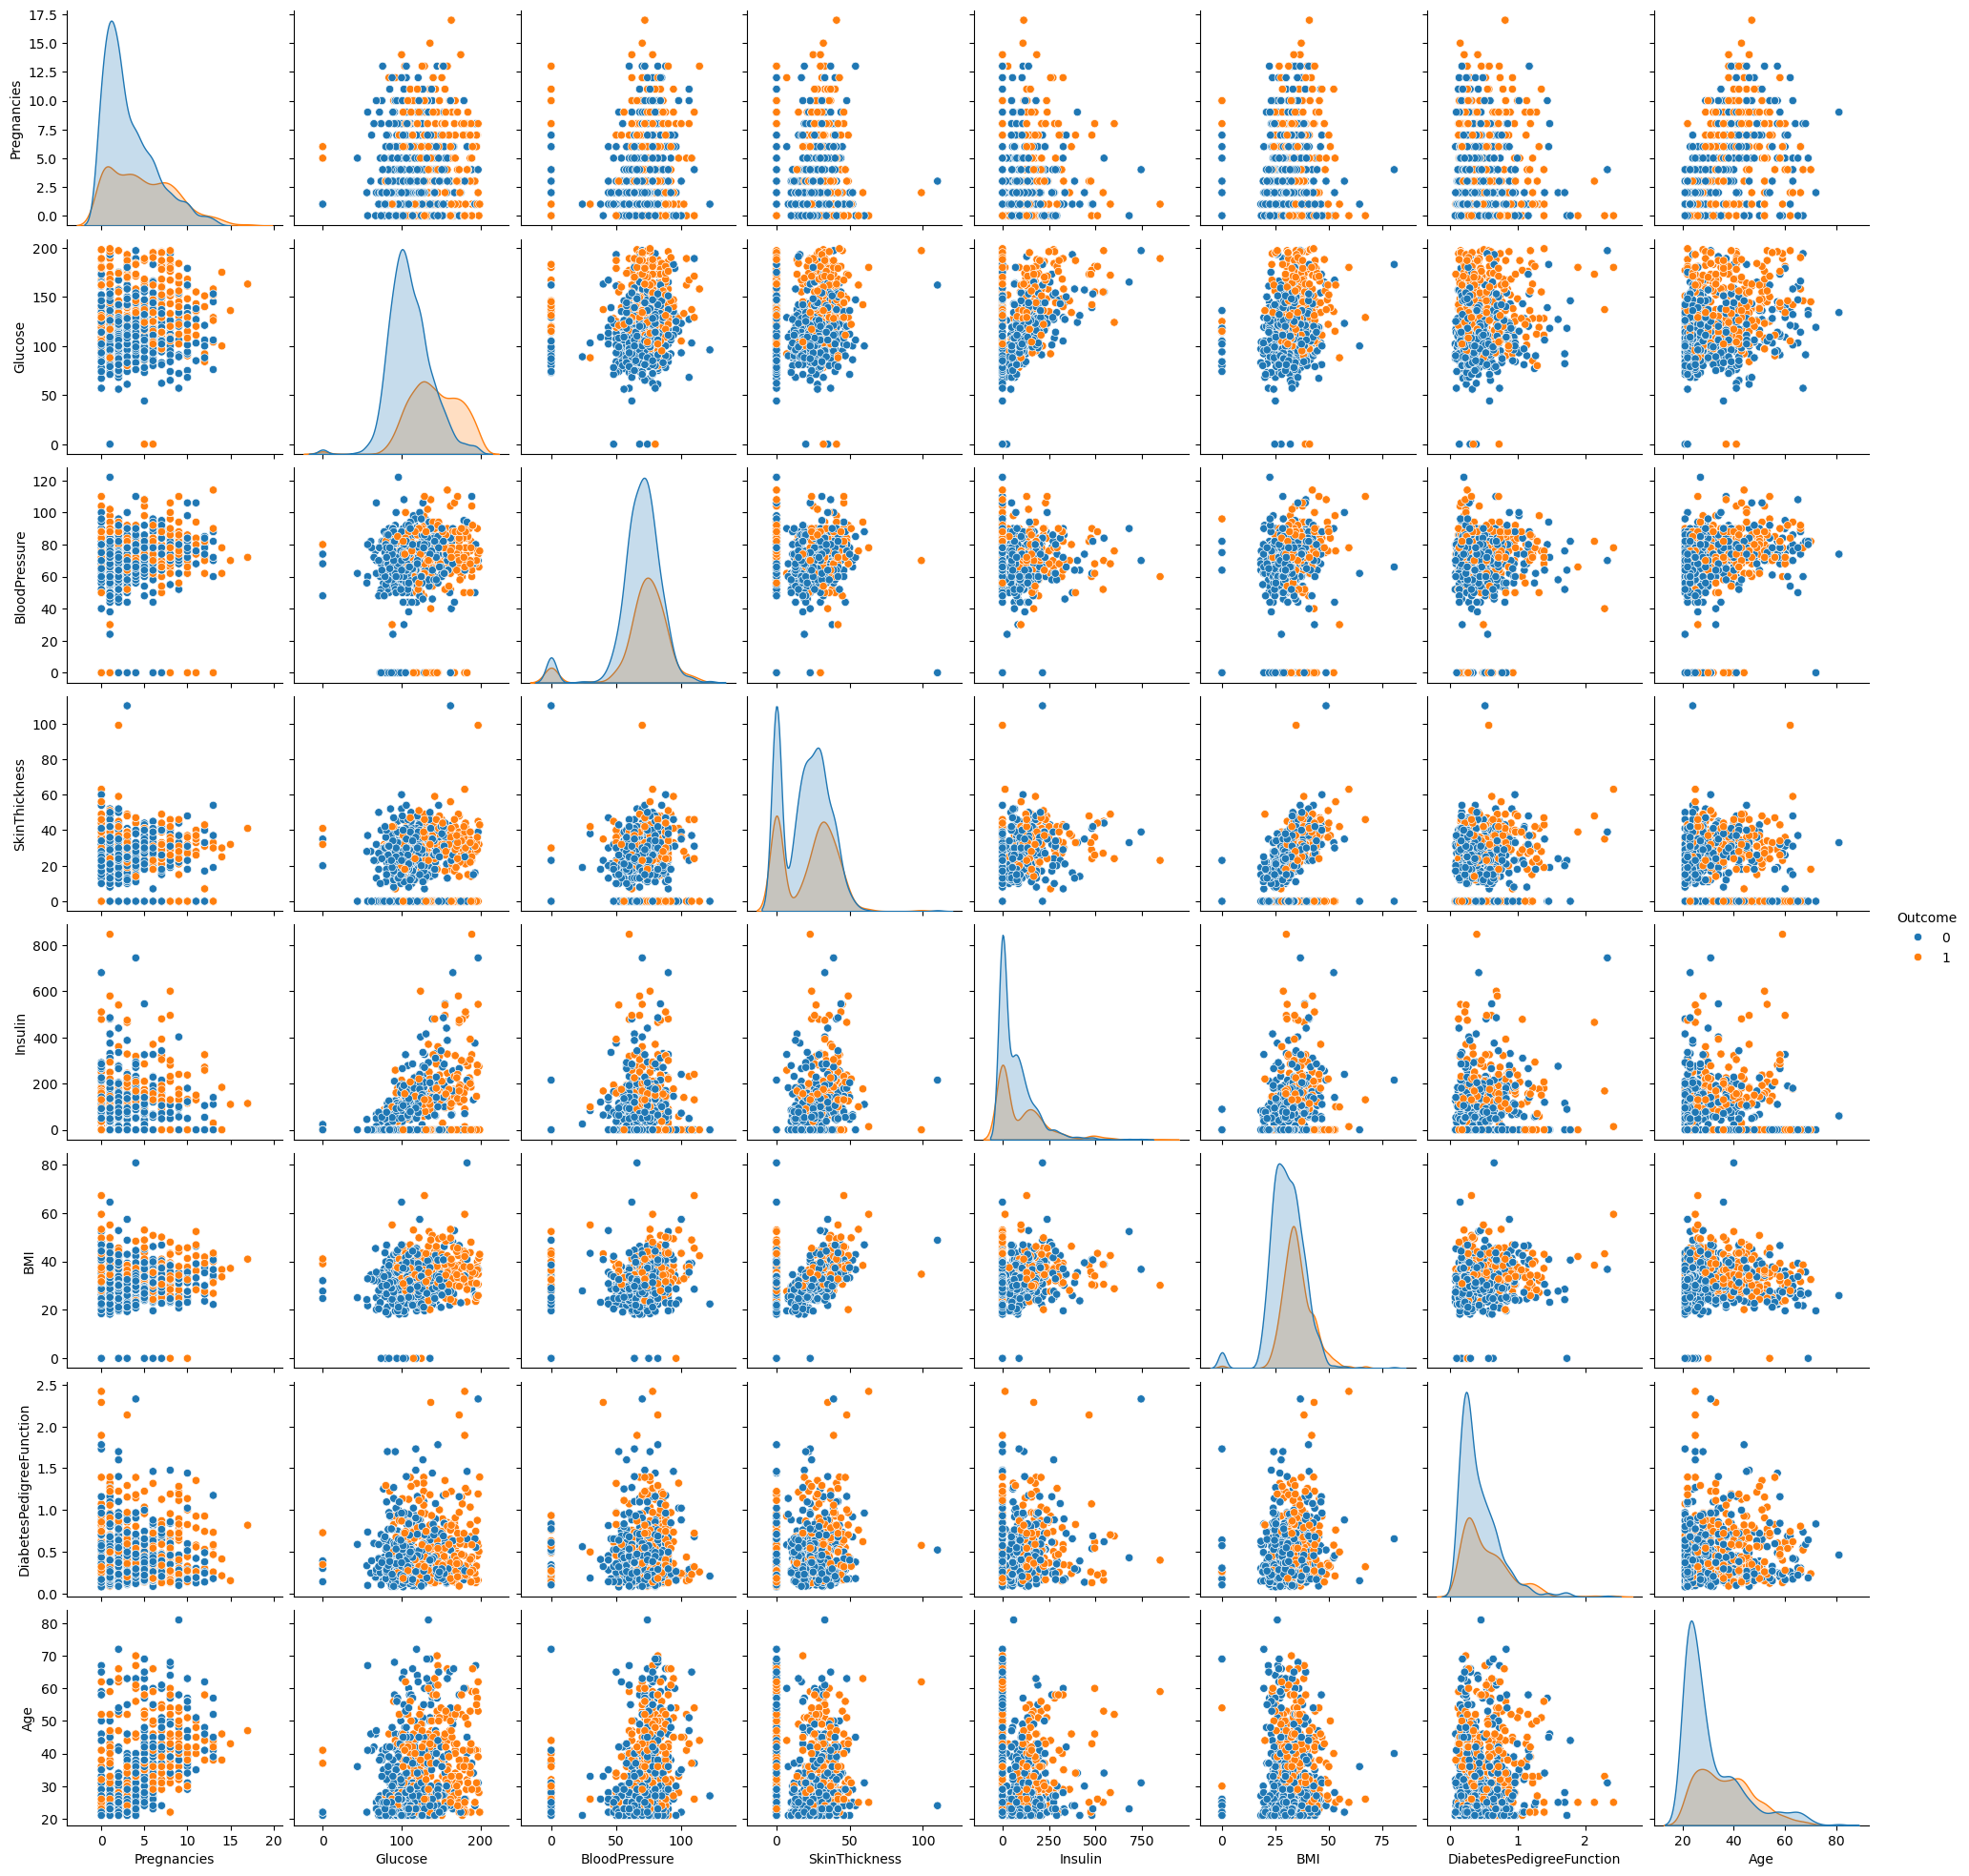

In [11]:
plt.figure(figsize=(20, 15))
sns.pairplot(data=df, hue='Outcome')
plt.show()

In [12]:
corr = df.corr()

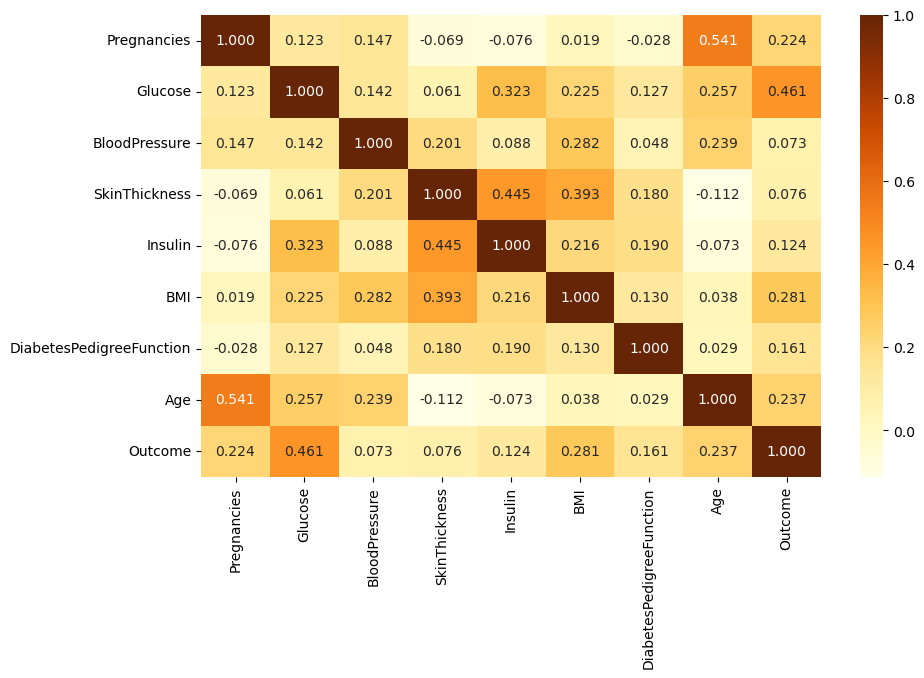

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt='.3f')
plt.show()

In [14]:
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=20)

In [16]:
tree=DecisionTreeClassifier(criterion="gini")
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_preds=tree.predict(X_test)

acc_score=accuracy_score(y_test, y_preds)
class_report=classification_report(y_test, y_preds)
conf_mat=confusion_matrix(y_test, y_preds)

print('Accuracy Score:', acc_score)
print('Classification Report\n', class_report)

Accuracy Score: 0.9682713347921226
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       574
           1       0.95      0.97      0.96       340

    accuracy                           0.97       914
   macro avg       0.96      0.97      0.97       914
weighted avg       0.97      0.97      0.97       914



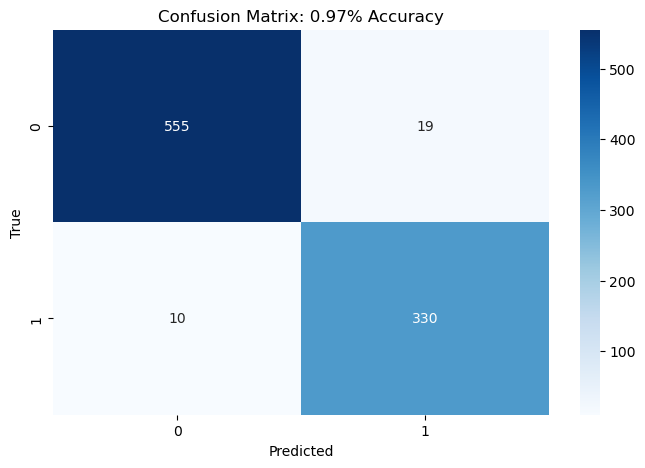

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {acc_score:.2f}% Accuracy')
plt.show()

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_preds = rf.predict(X_test)

acc_score = accuracy_score(y_test, y_preds)
class_report = classification_report(y_test, y_preds)
conf_mat = confusion_matrix(y_test, y_preds)

print('Accuracy Score:', acc_score)
print('Classification Report\n', class_report)

Accuracy Score: 0.9715536105032823
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       574
           1       0.97      0.95      0.96       340

    accuracy                           0.97       914
   macro avg       0.97      0.97      0.97       914
weighted avg       0.97      0.97      0.97       914



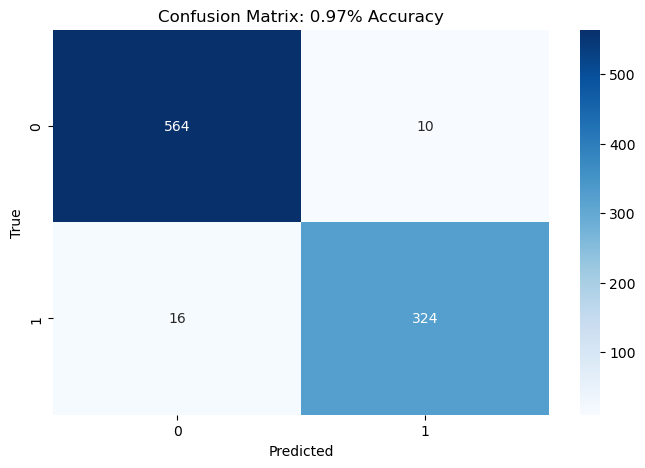

In [21]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix: {acc_score:.2f}% Accuracy')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Glucose and BMI show the strongest relationship with diabetes outcomes, where higher values are more commonly linked to positive cases. Some features, especially insulin and BMI, contain many outliers, which makes data cleaning a careful balance between accuracy and data loss. By prioritizing recall, the model reduces the risk of missing individuals who may have diabetes, which is important in medical screening contexts.